# SVM Model Analysis

## Load data and Libraries

In [1]:
import numpy as np
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import itertools

In [2]:
# Training Data
X_train = np.load("data/train_pixels.npy") 
X_trainLAND = np.load("data/train_landmarks.npy")
y_train = np.load("data/train_labels.npy")
    
# Public Test Data - Used to Validate Training
X_test = np.load("data/eval_pixels.npy")
X_testLAND = np.load("data/eval_landmarks.npy")
y_test = np.load("data/eval_labels.npy")

# Emotions
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

In [3]:
X_train = X_train.reshape(-1, 48*48)
X_test = X_test.reshape(-1, 48*48)

## SVM with Pixels

In [4]:
# 110 was determined during tuning
n_components = 110
pca = RandomizedPCA(n_components=n_components, whiten=True, random_state=42).fit(X_train)

eigenfaces = pca.components_.reshape((n_components, 48, 48))

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

clf = SVC(kernel='rbf', class_weight='balanced')
clf = clf.fit(X_train_pca, y_train)

In [5]:
# Creates titles for subplots
def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

# Creates subplots
def make_plot(images, titles, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((48, 48)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

# Creates confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label \n\n')

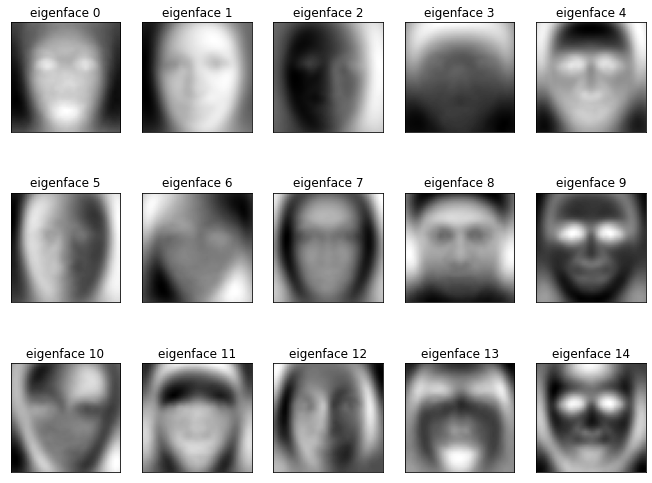

In [6]:
titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
make_plot(eigenfaces, titles, n_row=3, n_col=5)
plt.show()

In [7]:
y_pred = clf.predict(X_test_pca)
score = accuracy_score(y_test, y_pred)
print(score)

0.5564224017832266


In [8]:
print(classification_report(y_test, y_pred, target_names=emotions))

              precision    recall  f1-score   support

       Angry       0.35      0.42      0.38       355
     Disgust       0.90      0.38      0.54        47
        Fear       0.69      0.38      0.49        94
       Happy       0.64      0.64      0.64       904
         Sad       0.32      0.45      0.38       454
    Surprise       0.67      0.65      0.66       465
     Neutral       0.64      0.56      0.59      1270

    accuracy                           0.56      3589
   macro avg       0.60      0.50      0.53      3589
weighted avg       0.58      0.56      0.56      3589



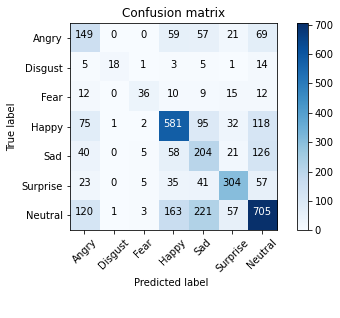

In [9]:
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = emotions)

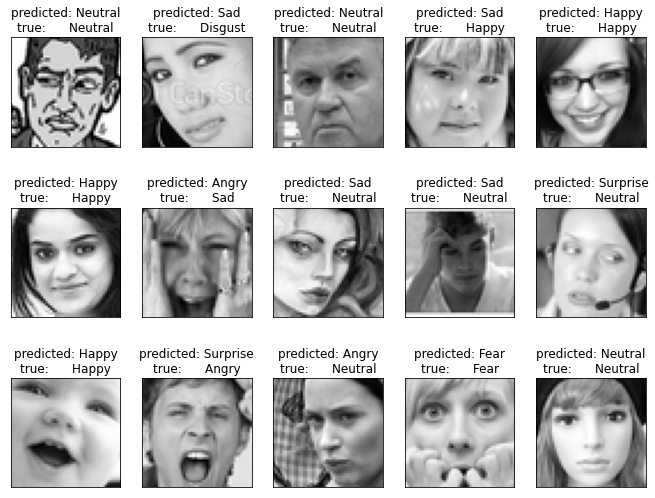

In [10]:
prediction_titles = [title(y_pred, y_test, emotions, i) for i in range(y_pred.shape[0])]
make_plot(X_test, prediction_titles, n_row=3, n_col=5)

## SVM with Face Landmarks

In [11]:
# 80 was determined during tuning
n_components = 80
pca = RandomizedPCA(n_components=n_components, whiten=True, random_state=42).fit(X_trainLAND)

X_train_pca = pca.transform(X_trainLAND)
X_test_pca = pca.transform(X_testLAND)

clf = SVC(kernel='rbf', class_weight='balanced')
clf = clf.fit(X_train_pca, y_train)

In [12]:
y_pred = clf.predict(X_test_pca)
score = accuracy_score(y_test, y_pred)
print(score)

0.5631095012538312


In [13]:
print(classification_report(y_test, y_pred, target_names=emotions))

              precision    recall  f1-score   support

       Angry       0.39      0.44      0.42       355
     Disgust       0.36      0.26      0.30        47
        Fear       0.32      0.36      0.34        94
       Happy       0.67      0.68      0.68       904
         Sad       0.33      0.35      0.34       454
    Surprise       0.56      0.62      0.59       465
     Neutral       0.66      0.59      0.62      1270

    accuracy                           0.56      3589
   macro avg       0.47      0.47      0.47      3589
weighted avg       0.57      0.56      0.57      3589



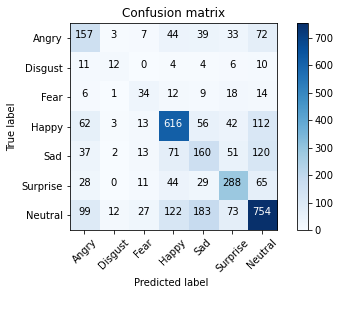

In [14]:
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = emotions)